# Bank Customer Churn Prediction
### Support Vector Machine

## Data Preparation

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

### Load dataset

In [ ]:
# Read the data frame
df = pd.read_csv('Churn_Modelling.csv')
df.shape

(10000, 14)

In [ ]:
df

RowNumber  CustomerId                  Surname  CreditScore Geography  \
0             1    15634602                 Hargrave          619    France   
1             2    15647311                     Hill          608     Spain   
2             3    15619304                     Onio          502    France   
3             4    15701354                     Boni          699    France   
4             5    15737888                 Mitchell          850     Spain   
5             6    15574012                      Chu          645     Spain   
6             7    15592531                 Bartlett          822    France   
7             8    15656148                   Obinna          376   Germany   
8             9    15792365                       He          501    France   
9            10    15592389                       H?          684    France   
10           11    15767821                   Bearce          528    France   
11           12    15737173                  Andrews          497     Spain   
12           13    15632264                      Kay          476    France   
13           14    15691483                     Chin          549    France   
14           15    15600882                    Scott          635     Spain   
15           16    15643966                  Goforth          616   Germany   
16           17    15737452                    Romeo          653   Germany   
17           18    15788218                Henderson          549     Spain   
18           19    15661507                  Muldrow          587     Spain   
19           20    15568982                      Hao          726    France   
20           21    15577657                 McDonald          732    France   
21           22    15597945                 Dellucci          636     Spain   
22           23    15699309                Gerasimov          510     Spain   
23           24    15725737                   Mosman          669    France   
24           25    15625047                      Yen          846    France   
25           26    15738191                  Maclean          577    France   
26           27    15736816                    Young          756   Germany   
27           28    15700772                  Nebechi          571    France   
28           29    15728693               McWilliams          574   Germany   
29           30    15656300                 Lucciano          411    France   
30           31    15589475                  Azikiwe          591     Spain   
31           32    15706552            Odinakachukwu          533    France   
32           33    15750181                Sanderson          553   Germany   
33           34    15659428                  Maggard          520     Spain   
34           35    15732963                 Clements          722     Spain   
35           36    15794171                 Lombardo          475    France   
36           37    15788448                   Watson          490     Spain   
37           38    15729599                  Lorenzo          804     Spain   
38           39    15717426                Armstrong          850    France   
39           40    15585768                  Cameron          582   Germany   
40           41    15619360                    Hsiao          472     Spain   
41           42    15738148                   Clarke          465    France   
42           43    15687946                  Osborne          556    France   
43           44    15755196                   Lavine          834    France   
44           45    15684171                  Bianchi          660     Spain   
45           46    15754849                    Tyler          776   Germany   
46           47    15602280                   Martin          829   Germany   
47           48    15771573                  Okagbue          637   Germany   
48           49    15766205                      Yin          550   Germany   
49           50    15771873                   Buccho    

In [ ]:
# Check columns list and missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
# Drop the columns
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [ ]:
# Review the top rows of the data frame
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [ ]:
# Check variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Exploratory Data Analysis

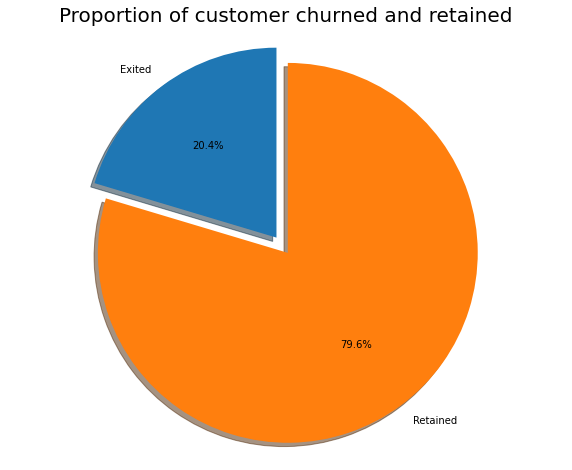

In [ ]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

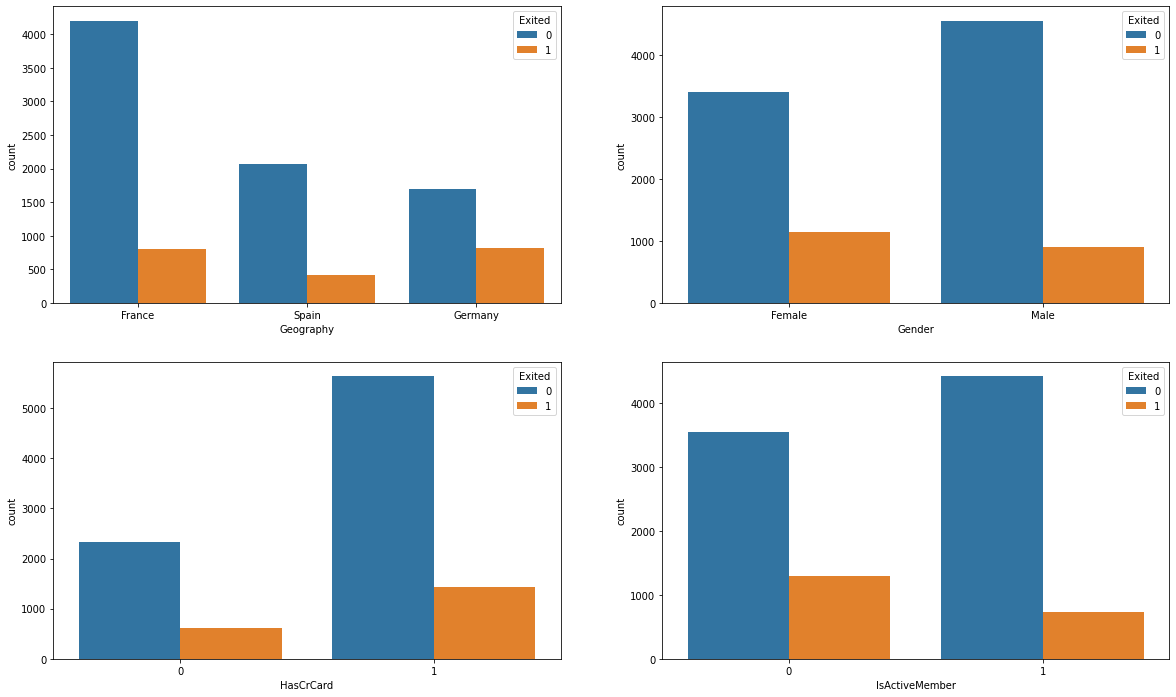

In [ ]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

We note the following:

* Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
* The proportion of female customers churning is also greater than that of male customers
* Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.
* Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definitely have a positive impact on the customer churn.

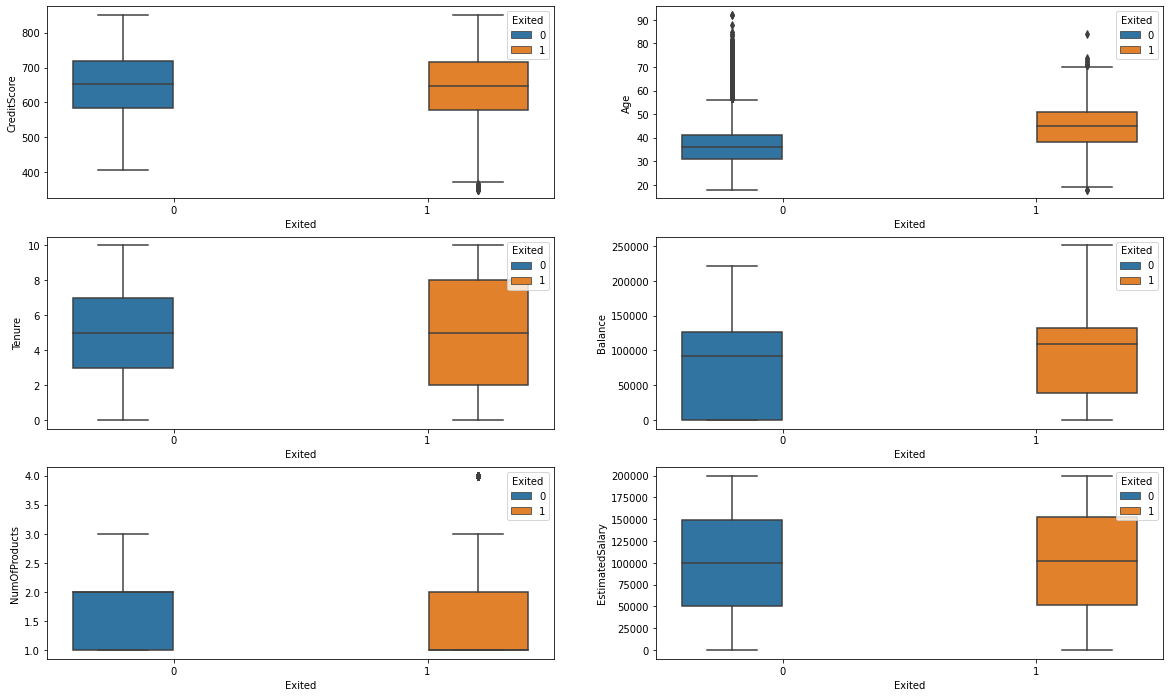

In [ ]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

We note the following:

* There is no significant difference in the credit score distribution between retained and churned customers.
* The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
* With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
* Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
* Neither the product nor the salary has a significant effect on the likelihood to churn.

## Train dataset

In [ ]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=200)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))

8000
2000


(-1.0, 5.0)

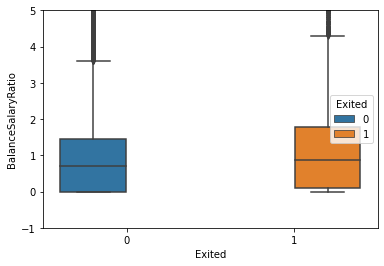

In [ ]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

We have seen that the salary has little effect on the chance of a customer churning. However as seen above, the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their source of loan capital.

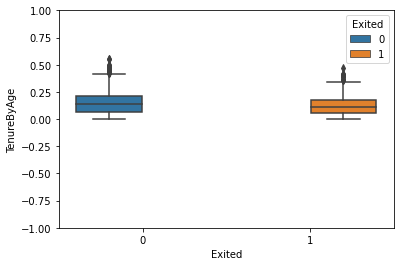

In [ ]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 1)
plt.show()

In [ ]:
'''Lastly we introduce a variable to capture credit score given age to take into account credit behaviour'''
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

In [ ]:
# Resulting Data Frame
df_train.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
8159          461     Spain  Female   25       6       0.00              2   
6332          619    France  Female   35       4   90413.12              1   
8895          699    France  Female   40       8  122038.34              1   
5351          558   Germany    Male   41       2  124227.14              1   
4314          638    France    Male   34       5  133501.36              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  BalanceSalaryRatio  \
8159          1               1         15306.29       0            0.000000   
6332          1               1         20555.21       0            4.398550   
8895          1               0        102085.35       0            1.195454   
5351          1               1        111184.67       0            1.117305   
4314          0               1        155643.04       0            0.857741   

      TenureByAge  CreditScoreGivenAge  
8159     0.240000            18.440000  
6332     0.114286            17.685714  
8895     0.200000            17.475000  
5351     0.048780            13.609756  
4314     0.147059            18.764706

## Data Preparation for Model Fitting

In [ ]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
df_train = df_train[['Exited'] + continuous_vars + cat_vars]
df_train.head()

Exited  CreditScore  Age  Tenure    Balance  NumOfProducts  \
8159       0          461   25       6       0.00              2   
6332       0          619   35       4   90413.12              1   
8895       0          699   40       8  122038.34              1   
5351       0          558   41       2  124227.14              1   
4314       0          638   34       5  133501.36              1   

      EstimatedSalary  BalanceSalaryRatio  TenureByAge  CreditScoreGivenAge  \
8159         15306.29            0.000000     0.240000            18.440000   
6332         20555.21            4.398550     0.114286            17.685714   
8895        102085.35            1.195454     0.200000            17.475000   
5351        111184.67            1.117305     0.048780            13.609756   
4314        155643.04            0.857741     0.147059            18.764706   

      HasCrCard  IsActiveMember Geography  Gender  
8159          1               1     Spain  Female  
6332          1               1    France  Female  
8895          1               0    France  Female  
5351          1               1   Germany    Male  
4314          0               1    France    Male

In [ ]:
'''For the one hot variables, we change 0 to -1 so that the models can capture a negative relation 
where the attribute is inapplicable instead of 0'''
df_train.loc[df_train.HasCrCard == 0, 'HasCrCard'] = -1
df_train.loc[df_train.IsActiveMember == 0, 'IsActiveMember'] = -1
df_train.head()

Exited  CreditScore  Age  Tenure    Balance  NumOfProducts  \
8159       0          461   25       6       0.00              2   
6332       0          619   35       4   90413.12              1   
8895       0          699   40       8  122038.34              1   
5351       0          558   41       2  124227.14              1   
4314       0          638   34       5  133501.36              1   

      EstimatedSalary  BalanceSalaryRatio  TenureByAge  CreditScoreGivenAge  \
8159         15306.29            0.000000     0.240000            18.440000   
6332         20555.21            4.398550     0.114286            17.685714   
8895        102085.35            1.195454     0.200000            17.475000   
5351        111184.67            1.117305     0.048780            13.609756   
4314        155643.04            0.857741     0.147059            18.764706   

      HasCrCard  IsActiveMember Geography  Gender  
8159          1               1     Spain  Female  
6332          1               1    France  Female  
8895          1              -1    France  Female  
5351          1               1   Germany    Male  
4314         -1               1    France    Male

In [ ]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == np.str or df_train[i].dtype == np.object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

Exited  CreditScore  Age  Tenure    Balance  NumOfProducts  \
8159       0          461   25       6       0.00              2   
6332       0          619   35       4   90413.12              1   
8895       0          699   40       8  122038.34              1   
5351       0          558   41       2  124227.14              1   
4314       0          638   34       5  133501.36              1   

      EstimatedSalary  BalanceSalaryRatio  TenureByAge  CreditScoreGivenAge  \
8159         15306.29            0.000000     0.240000            18.440000   
6332         20555.21            4.398550     0.114286            17.685714   
8895        102085.35            1.195454     0.200000            17.475000   
5351        111184.67            1.117305     0.048780            13.609756   
4314        155643.04            0.857741     0.147059            18.764706   

      HasCrCard  IsActiveMember  Geography_Spain  Geography_France  \
8159          1               1                1                -1   
6332          1               1               -1                 1   
8895          1              -1               -1                 1   
5351          1               1               -1                -1   
4314         -1               1               -1                 1   

      Geography_Germany  Gender_Female  Gender_Male  
8159                 -1              1           -1  
6332                 -1              1           -1  
8895                 -1              1           -1  
5351                  1             -1            1  
4314                 -1             -1            1

In [ ]:
# minMax scaling the continuous variables
minVec = df_train[continuous_vars].min().copy()
maxVec = df_train[continuous_vars].max().copy()
df_train[continuous_vars] = (df_train[continuous_vars]-minVec)/(maxVec-minVec)
df_train.head()

Exited  CreditScore       Age  Tenure   Balance  NumOfProducts  \
8159       0        0.222  0.094595     0.6  0.000000       0.333333   
6332       0        0.538  0.229730     0.4  0.360358       0.000000   
8895       0        0.698  0.297297     0.8  0.486406       0.000000   
5351       0        0.416  0.310811     0.2  0.495130       0.000000   
4314       0        0.576  0.216216     0.5  0.532094       0.000000   

      EstimatedSalary  BalanceSalaryRatio  TenureByAge  CreditScoreGivenAge  \
8159         0.076118            0.000000     0.432000             0.323157   
6332         0.102376            0.003317     0.205714             0.305211   
8895         0.510225            0.000901     0.360000             0.300198   
5351         0.555744            0.000843     0.087805             0.208238   
4314         0.778145            0.000647     0.264706             0.330882   

      HasCrCard  IsActiveMember  Geography_Spain  Geography_France  \
8159          1               1                1                -1   
6332          1               1               -1                 1   
8895          1              -1               -1                 1   
5351          1               1               -1                -1   
4314         -1               1               -1                 1   

      Geography_Germany  Gender_Female  Gender_Male  
8159                 -1              1           -1  
6332                 -1              1           -1  
8895                 -1              1           -1  
5351                  1             -1            1  
4314                 -1             -1            1

In [ ]:
# data prep pipeline for test data
def DfPrepPipeline(df_predict,df_train_Cols,minVec,maxVec):
    # Add new features
    df_predict['BalanceSalaryRatio'] = df_predict.Balance/df_predict.EstimatedSalary
    df_predict['TenureByAge'] = df_predict.Tenure/(df_predict.Age - 18)
    df_predict['CreditScoreGivenAge'] = df_predict.CreditScore/(df_predict.Age - 18)
    # Reorder the columns
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"] 
    df_predict = df_predict[['Exited'] + continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    df_predict.loc[df_predict.HasCrCard == 0, 'HasCrCard'] = -1
    df_predict.loc[df_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    # One hot encode the categorical variables
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in df_predict[i].unique():
            df_predict[i+'_'+j] = np.where(df_predict[i] == j,1,-1)
        remove.append(i)
    df_predict = df_predict.drop(remove, axis=1)
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1        
    # MinMax scaling continuous variables based on min and max from the train data
    df_predict[continuous_vars] = (df_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    df_predict = df_predict[df_train_Cols]
    return df_predict

## Model Fitting

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method, method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [ ]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)


SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Review best model fit accuracy : Performance in predicting 1's (Customers who churn)

Aim is to predict the customers that will possibly churn so they can be put in some sort of scheme to prevent churn hence the recall measures on the 1's is of more importance than the overall accuracy score of the model.

We want to get recall as high as possible while trying to maintain a high precision so that the bank can train its resources effectively towards clients highlighted by the model without wasting too much resources on the false positives.

In [ ]:
print(classification_report(df_train.Exited,  SVM_POL.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.84      0.38      0.52      1647

    accuracy                           0.86      8000
   macro avg       0.85      0.68      0.72      8000
weighted avg       0.85      0.86      0.83      8000



In [ ]:
print(classification_report(df_train.Exited,  SVM_RBF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.85      0.40      0.54      1647

    accuracy                           0.86      8000
   macro avg       0.86      0.69      0.73      8000
weighted avg       0.86      0.86      0.84      8000



In [ ]:
print(classification_report(df_train.Exited,  RF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6353
           1       0.89      0.52      0.65      1647

    accuracy                           0.89      8000
   macro avg       0.89      0.75      0.79      8000
weighted avg       0.89      0.89      0.87      8000



The best model that gives a decent balance of the recall and precision is the random forest where according to the fit on the training set, with a precision score on 1's of 0.88, out of all customers that the model thinks will churn, 88% do actually churn and with the recall score of 0.53 on the 1's, the model is able to highlight 53% of all those who churned.

In [ ]:
y = df_train.Exited
X = df_train.loc[:, df_train.columns != 'Exited']
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])

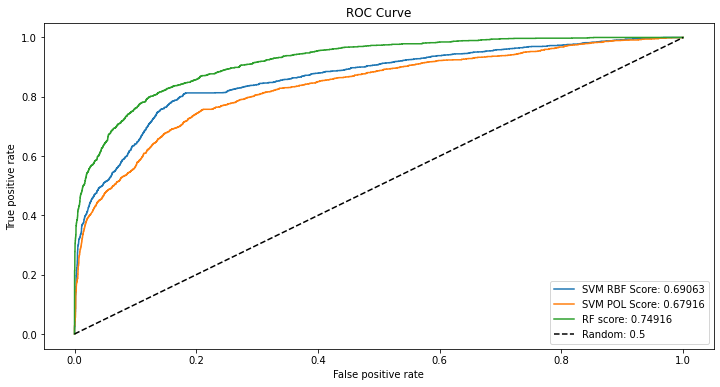

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

## Test model prediction accuracy on test data

In [ ]:
# Make the data transformation for test data
df_test = DfPrepPipeline(df_test,df_train.columns,minVec,maxVec)
df_test = df_test.mask(np.isinf(df_test))
df_test = df_test.dropna()
df_test.shape

(1996, 17)

In [ ]:
print(classification_report(df_test.Exited,  RF.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1607
           1       0.81      0.40      0.54       389

    accuracy                           0.86      1996
   macro avg       0.84      0.69      0.73      1996
weighted avg       0.86      0.86      0.85      1996



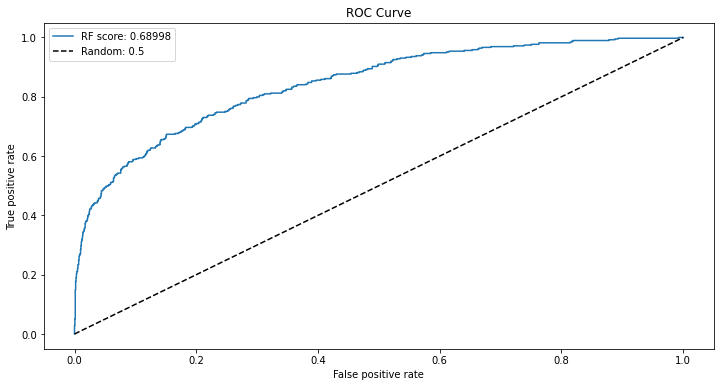

In [ ]:
auc_RF_test, fpr_RF_test, tpr_RF_test = get_auc_scores(df_test.Exited, RF.predict(df_test.loc[:, df_test.columns != 'Exited']),
                                                       RF.predict_proba(df_test.loc[:, df_test.columns != 'Exited'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

The precision of the model on previously unseen test data is slightly higher with regard to predicting 1's i.e. those customers that churn. However, we can improve the accuracy by retraining the model with more data over time.